In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tsfresh import select_features
from pycaret.classification import *
from tsfresh import extract_features
from tsfresh import extract_relevant_features
from sklearn.ensemble import ExtraTreesClassifier
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters
from notebooks_preprocessing_and_dataframe_creation import preprocessing_functions

In [2]:
cmap='seismic'
sns.set_palette(sns.color_palette(cmap))

In [3]:
metric = 'AUC' # F1 or AUC

In [4]:
df = pd.read_pickle('../data/unified_dataframe/data_unprocessed.pkl')
df

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,badgeType,calories,filteredDemographicVO2Max,distance,activityType,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,heart_rate_alert,startTime,endTime,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,NaN,14.8,78.0,0.833333,0.675,0.866667,-1.788325,None,2351.59,62.79210,6517.5,[Walk],71.701565,149.0,24.0,33.0,713.0,False,NaN,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,<30,MALE,<19,None,2021-05-24T00:40:00.000,2021-05-24T09:21:00.000,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,NaN,NaN
1,621e328667b776a240281372,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2619.85,41.38447,6568.9,[Walk],83.919698,132.0,7.0,30.0,1271.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8550.0,278.0,766.0,29.0,1.0,>=30,MALE,>=30,None,NaN,NaN,Maintenance,intrinsic_regulation,NaN,HIGH,AVERAGE,HIGH,LOW,LOW,NaN,NaN
2,621e326767b776a24012e179,2021-05-24,NaN,46.120,53.968,95.3,14.4,80.0,0.666667,0.925,0.766667,-4.129593,None,2204.50,52.76058,11283.7,[Walk],68.275766,278.0,41.0,67.0,616.0,False,NaN,52.516339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16992.0,131.0,1225.0,0.0,0.0,<30,FEMALE,<19,None,NaN,NaN,Maintenance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,621e332267b776a24092a584,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,3792.13,53.53183,16776.8,[Walk],78.842893,190.0,79.0,108.0,1063.0,False,NaN,60.977217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21284.0,175.0,1130.0,9.0,0.0,<30,MALE,21.0,None,NaN,NaN,Maintenance,identified_regulation,NaN,LOW,LOW,LOW,AVERAGE,HIGH,NaN,NaN
4,621e333567b776a240a0c217,2021-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[LIFETIME_DISTANCE],NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<30,MALE,21.0,None,NaN,NaN,Contemplation,intrinsic_regulation,NaN,AVERAGE,HIGH,AVERAGE,LOW,LOW,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,621e30b267b776a240c5e13f,2022-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,1554.15,42.17696,209.4,None,89.131283,33.0,0.0,0.0,1407.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,287.0,19.0,126.0,0.0,0.0,<30,FEMALE,21.0,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7800,621e312a67b776a240164d59,2022-01-17,34.237581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.165995,[DAILY_FLOORS],1602.67,47.22494,3806.9,None,67.473381,125.0,27.0,5.0,116.0,False,NaN,58.157746,25800000.0,0.0,379.0,51.0,1.0,94.0,0.835443,0.728571,0.796667,0.902439,4966.0,114.0,563.0,0.0,0.0,>=30,MALE,25.0,None,2022-01-17T00:45:00.000,2022-01-17T07:55:00.000,Contemplation,intrinsic_regulation,NaN,AVERAGE,LOW,HIGH,AVERAGE,LOW,NaN,NaN
7801,621e309b67b776a240b532b0,2022-01-17,31.815133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.999818,[DAILY_FLOORS],2887.52,49.82090,9000.0,"[Sport, Walk]",74.452687,164.0,37.0,63.0,875.0,False,NaN,64.007904,18060000.0,0.0,276.0,25.0,0.0,99.0,0.708333,0.609756,0.714286,1.066667,12096.0,129.0

In [5]:
df_pre = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
df_pre

,id,date,nightly_temperature,nremhr,rmssd,spo2,full_sleep_breathing_rate,stress_score,sleep_points_percentage,exertion_points_percentage,responsiveness_points_percentage,daily_temperature_variation,calories,filteredDemographicVO2Max,distance,bpm,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,mindfulness_session,scl_avg,resting_hr,sleep_duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,sleep_efficiency,sleep_deep_ratio,sleep_wake_ratio,sleep_light_ratio,sleep_rem_ratio,steps,minutes_in_default_zone_1,minutes_below_default_zone_1,minutes_in_default_zone_2,minutes_in_default_zone_3,age,gender,bmi,label_ttm_stage,label_breq_self_determination,label_sema_negative_feelings,label_ipip_extraversion_category,label_ipip_agreeableness_category,label_ipip_conscientiousness_category,label_ipip_stability_category,label_ipip_intellect_category,label_stai_stress_category,label_panas_negative_affect,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,DAILY_FLOORS,DAILY_STEPS,GOAL_BASED_WEIGHT_LOSS,LIFETIME_DISTANCE,LIFETIME_FLOORS,LIFETIME_WEIGHT_GOAL_SETUP,Aerobic Workout,Bike,Bootcamp,Circuit Training,Elliptical,Hike,Interval Workout,Martial Arts,Run,Spinning,Sport,Swim,Treadmill,Walk,Weights,Workout,Yoga/Pilates,wear_day,early_features,used_during_night,different_activity_types,different_badge_types,is_index,iv_index,sri_index,sjl_index,mode_startTime,mode_endTime,mode_startTime_sin,mode_startTime_cos,mode_endTime_sin,mode_endTime_cos,isp_index,steps_is_index,steps_iv_index,steps_sri_index,steps_isp_index,exercise_is_index,exercise_iv_index,exercise_sri_index,stress_quantile,user_stress_quantile,average_sleep_duration,average_steps,is_weekend,is_holiday,startDay_sin,startDay_cos,startWeek_sin,startWeek_cos,startWeekday_sin,startWeekday_cos,startMonth_sin,startMonth_cos,startYear_sin,startYear_cos,endDay_sin,endDay_cos,endWeek_sin,endWeek_cos,endWeekday_sin,endWeekday_cos,endMonth_sin,endMonth_cos,endYear_sin,endYear_cos,startHour_sin,startHour_cos,endHour_sin,endHour_cos,Steps_hour0,Steps_hour1,Steps_hour2,Steps_hour3,Steps_hour4,Steps_hour5,Steps_hour6,Steps_hour7,Steps_hour8,Steps_hour9,Steps_hour10,Steps_hour11,Steps_hour12,Steps_hour13,Steps_hour14,Steps_hour15,Steps_hour16,Steps_hour17,Steps_hour18,Steps_hour19,Steps_hour20,Steps_hour21,Steps_hour22,Steps_hour23
0,621e2e8e67b776a24055b564,2021-05-24,34.137687,57.432,89.603,95.9,14.8,78.0,0.833333,0.675,0.866667,-1.788325,2351.59,62.79210,6517.5,71.701565,149.0,24.0,33.0,713.0,0.0,10.907065,62.073070,31260000.0,0.0,445.0,76.0,0.0,93.0,1.243243,0.987013,0.921642,1.341772,8833.0,83.0,1349.0,0.0,0.0,0.0,0.0,Underweight,Maintenance,intrinsic_regulation,NaN,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.000000,3.090170e-01,-0.988468,0.5,1.000000,0.951057,0.151428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0.873563,1,4,0.930443,0.343581,90.495130,1.091284,23.0,9.0,0.382683,-0.92388,-3.826834e-01,-0.92388,0.945035,0.287117,1.655374,89.963574,0.381108,0.224056,2.003963,77.127735,2,1,3.255517e+07,8892.885057,0.0,0.0,0.060330,0.998178,-0.281733,0.959493,0.000000,1.000000,0.012703,0.999919,-0.908669,0.417518,0.060330,0.998178,-0.0,1.0,0.000000,1.000000,0.012703,0.999919,-0.908669,0.417518,0.000000,1.000000,0.022699,0.999742,134.0,0.0,0.0,15.0,0.0,0.0,39.0,0.0,7.0,10.0,2626.0,992.0,429.0,29.0,191.0,33.0,342.0,1712.0,1838.0,160.0,155.0,37.0,31.0,53.0
1,621e2e8e67b776a24055b564,2021-05-25,33.794544,57.681,94.303,95.9,15.8,80.0,0.833333,0.725,0.866667,-2.462709,2332.08,62.67912,7178.6,70.579300,132.0,25.0,31.0,704.0,0.0,10.907065,62.121476,32880000.0,0.0,460.0,88.0,0.0,94.0,1.466667,1.142857,0.947566,1.197531,9727.0,56.0,1374.0,4.0,0.0,0.0,0.0,Underweight,Maintenance,intrinsic_regulation,1.0,LOW,LOW,HIGH,HIGH,AVERAGE,Below average,Below average,-0.866025,0.781831,3.090170e-01,-0.937752,0.5,0.623490,0.951057,0.347305,0.0,0.0,0.0,0.0,0.0,0.0,0

# Predict personality stability

In [6]:
stability = df.drop(columns=['date','startTime', 'endTime', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_intellect_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])

In [7]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(stability)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [8]:
s = setup(data=train_data, target='label_ipip_stability_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

,Description,Value
0,session_id,123
1,Target,label_ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(5199, 43)"
5,Missing Values,True
6,Numeric Features,33
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


In [9]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.3284,0.5000,0.3333,0.1437,0.1923,0.0000,0.0000,0.0800
lda,Linear Discriminant Analysis,0.3666,0.4989,0.2596,0.4578,0.4004,-0.0071,-0.0106,0.1133
ada,Ada Boost Classifier,0.3677,0.4940,0.2944,0.4718,0.3737,0.0276,0.0325,0.3667
knn,K Neighbors Classifier,0.3247,0.4857,0.3246,0.4863,0.3415,-0.0054,-0.0020,1.0233
qda,Quadratic Discriminant Analysis,0.2497,0.4585,0.2183,0.2498,0.2326,-0.0602,-0.0865,0.2433
dt,Decision Tree Classifier,0.2503,0.4359,0.2166,0.3812,0.2797,-0.1142,-0.1269,0.0600
lr,Logistic Regression,0.3622,0.4246,0.2909,0.2471,0.2823,-0.0849,-0.0898,1.9167
lightgbm,Light Gradient Boosting Machine,0.2744,0.4079,0.2326,0.3926,0.2983,-0.0699,-0.0845,0.8867
nb,Naive Bayes,0.1592,0.3613,0.1914,0.2555,0.1618,-0.1424,-0.2026,1.0800
gbc,Gradient Boosting Classifier,0.2333,0.3601,0.1937,0.3359,0.2436,-0.1182,-0.1447,2.8933


In [11]:
model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3610,0.4569,0.2864,0.5525,0.3862,-0.0110,-0.0139
1,0.2671,0.3418,0.1847,0.2252,0.2444,-0.1079,-0.1283
2,0.4750,0.6832,0.4121,0.6378,0.4904,0.2018,0.2395
Mean,0.3677,0.4940,0.2944,0.4718,0.3737,0.0276,0.0325
Std,0.0850,0.1418,0.0930,0.1778,0.1008,0.1294,0.1537


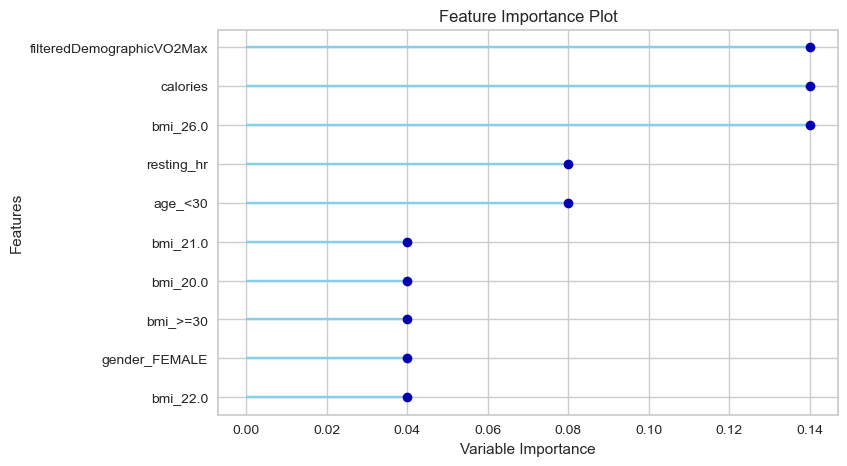

In [12]:
plot_model(model, plot='feature')

In [13]:
stability = df_pre.drop(columns=['date', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_intellect_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])

In [14]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(stability)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [15]:
s = setup(data=train_data, target='label_ipip_stability_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(5199, 148)"
5,Missing Values,True
6,Numeric Features,107
7,Categorical Features,40
8,Ordinal Features,False
9,High Cardinality Features,False


In [16]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.4566,0.5000,0.3333,0.2653,0.3287,0.0000,0.0000,0.2867
et,Extra Trees Classifier,0.1948,0.4724,0.1728,0.2617,0.1972,-0.1249,-0.2080,0.4200
qda,Quadratic Discriminant Analysis,0.2983,0.4694,0.2336,0.3647,0.3080,-0.0629,-0.0937,0.3600
nb,Naive Bayes,0.3115,0.4679,0.2720,0.4182,0.3346,-0.0431,-0.0477,0.2067
lr,Logistic Regression,0.1823,0.4514,0.1486,0.3876,0.2137,-0.1621,-0.2203,0.6000
knn,K Neighbors Classifier,0.2108,0.4299,0.1533,0.3500,0.2518,-0.1395,-0.1802,0.8133
dt,Decision Tree Classifier,0.1849,0.3697,0.1553,0.2818,0.2165,-0.2035,-0.2383,0.2067
ada,Ada Boost Classifier,0.2168,0.3486,0.1961,0.5155,0.2324,-0.0924,-0.1364,0.7167
lda,Linear Discriminant Analysis,0.1658,0.3432,0.1606,0.3207,0.1838,-0.1328,-0.1926,0.3033
gbc,Gradient Boosting Classifier,0.1428,0.3386,0.1770,0.1936,0.1426,-0.2326,-0.2810,5.7367


In [17]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2728,0.5860,0.2403,0.4372,0.2870,-0.0553,-0.0706
1,0.0044,0.4128,0.0119,0.0007,0.0011,-0.2186,-0.4388
2,0.3074,0.4184,0.2662,0.3473,0.3033,-0.1009,-0.1146
Mean,0.1948,0.4724,0.1728,0.2617,0.1972,-0.1249,-0.2080
Std,0.1354,0.0804,0.1143,0.1882,0.1388,0.0688,0.1642


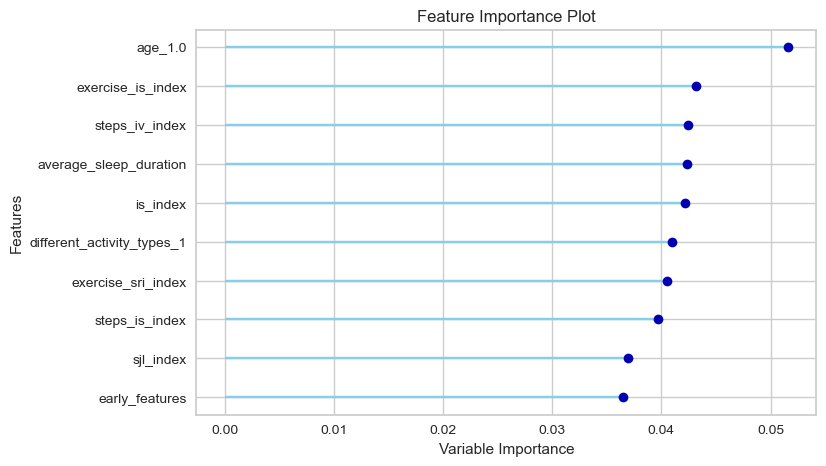

In [18]:
plot_model(model, plot='feature')

In [6]:
df = pd.read_pickle('../data/unified_dataframe/data_preprocessed.pkl')
stability = df.drop(columns=['date', 'label_sema_negative_feelings', 'label_ipip_agreeableness_category', 'label_ipip_extraversion_category','label_ipip_intellect_category', 'label_ipip_conscientiousness_category', 'label_stai_stress_category', 'label_panas_negative_affect', 'label_ttm_stage', 'label_breq_self_determination'])
stability = stability[stability['label_ipip_stability_category'].notna()]
y = stability['label_ipip_stability_category']

In [7]:
cols = ['stress_score', 'steps', 'sleep_duration']
for col in cols:
    extracted_features = extract_features(df, column_id="id", column_sort="date",
                                          n_jobs=5, column_kind=None, column_value=col,
                                          show_warnings=False)
    extracted_features = extracted_features.reset_index()
    extracted_features = extracted_features.rename(columns={"index": "id"})
    stability = stability.merge(extracted_features, how='left', on=['id'])

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 24/24 [00:04<00:00,  5.09it/s]


In [8]:
train_data, test_data = preprocessing_functions.train_test_split_per_user(stability)
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [9]:
s = setup(data=train_data, target='label_ipip_stability_category', silent=True, session_id=123,
          fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data,
          normalize=True, normalize_method='minmax', fix_imbalance=True, remove_multicollinearity = True, multicollinearity_threshold = 0.6)

,Description,Value
0,session_id,123
1,Target,label_ipip_stability_category
2,Target Type,Multiclass
3,Label Encoded,"AVERAGE: 0, HIGH: 1, LOW: 2"
4,Original Data,"(3985, 2515)"
5,Missing Values,True
6,Numeric Features,2240
7,Categorical Features,274
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
best = compare_models(sort = '%s'%metric) # change to F1 and AUC

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.4477,0.5565,0.4885,0.5238,0.3887,0.1673,0.2076,0.6167
ada,Ada Boost Classifier,0.3584,0.5304,0.3444,0.3784,0.3288,-0.0561,-0.0653,1.1033
lightgbm,Light Gradient Boosting Machine,0.3738,0.5146,0.2481,0.3262,0.3414,-0.1044,-0.1240,1.4467
dummy,Dummy Classifier,0.4629,0.5000,0.3333,0.2437,0.3130,0.0000,0.0000,0.4500
nb,Naive Bayes,0.3293,0.4983,0.3220,0.3612,0.3069,-0.0275,-0.0206,1.0433
gbc,Gradient Boosting Classifier,0.3657,0.4899,0.2920,0.2959,0.3122,-0.0797,-0.0924,7.4867
dt,Decision Tree Classifier,0.3182,0.4793,0.3511,0.3383,0.3044,-0.0416,-0.0621,0.4500
knn,K Neighbors Classifier,0.2534,0.4776,0.2452,0.4197,0.2635,-0.0477,-0.0550,3.5933
qda,Quadratic Discriminant Analysis,0.2080,0.4734,0.3428,0.1162,0.1077,-0.0191,-0.0389,0.6200
et,Extra Trees Classifier,0.2842,0.4223,0.2757,0.2459,0.2243,-0.1092,-0.1300,0.6133


In [24]:
lr = create_model('lr', fold=3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2082,0.2962,0.2747,0.2178,0.2039,-0.2445,-0.2524
1,0.2324,0.4498,0.3333,0.0540,0.0877,0.0000,0.0000
2,0.2602,0.4455,0.2335,0.3768,0.2618,-0.1284,-0.1657
Mean,0.2336,0.3971,0.2805,0.2162,0.1845,-0.1243,-0.1394
Std,0.0213,0.0714,0.0410,0.1318,0.0724,0.0998,0.1047


In [25]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2223,0.2911,0.2869,0.2339,0.2195,-0.2288,-0.2354
1,0.2324,0.4475,0.3333,0.0540,0.0877,0.0000,0.0000
2,0.2639,0.4434,0.2355,0.3812,0.2663,-0.1262,-0.1626
Mean,0.2396,0.3940,0.2852,0.2230,0.1912,-0.1183,-0.1327
Std,0.0177,0.0728,0.0400,0.1338,0.0756,0.0936,0.0984


In [26]:
print(tuned_lr)

LogisticRegression(C=8.866, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


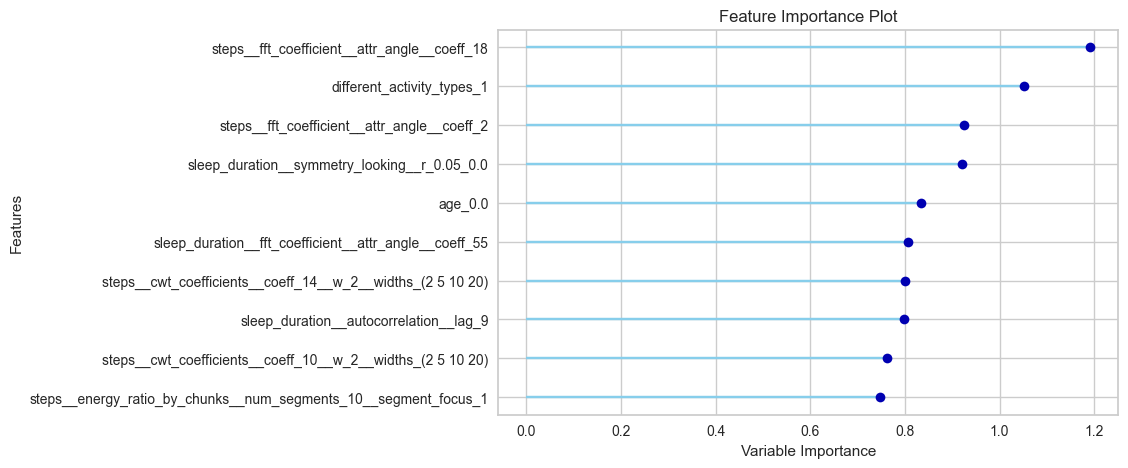

In [27]:
plot_model(tuned_lr, plot = 'feature')

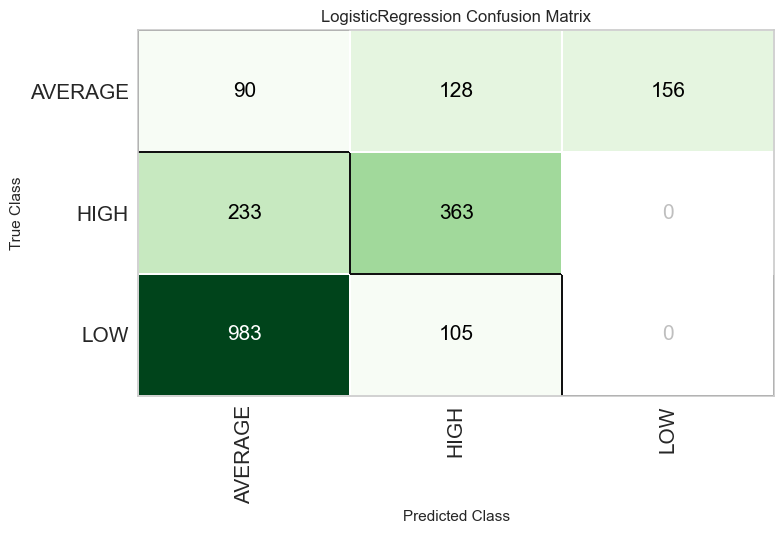

In [28]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [29]:
d=pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(tuned_lr.coef_[0])}).sort_values(by='Value', ascending=False)

In [30]:
d.reset_index(inplace=True)
d=d.head(10)
d = d.drop(columns='index')
d['Label'] = 'stability'
d = d[['Label', 'Feature', 'Value']]
d.to_pickle('../data/feature_importances/stability.pkl')
d

,Label,Feature,Value
0,stability,steps__fft_coefficient__attr_angle__coeff_18,1.191270
1,stability,different_activity_types_1,1.052601
2,stability,steps__fft_coefficient__attr_angle__coeff_2,0.925431
3,stability,sleep_duration__symmetry_looking__r_0.05_0.0,0.919487
4,stability,age_0.0,0.833951
5,stability,sleep_duration__fft_coefficient__attr_angle__c...,0.807154
6,stability,steps__cwt_coefficients__coeff_14__w_2__widths...,0.800994
7,stability,sleep_duration__autocorrelation__lag_9,0.797432
8,stability,steps__cwt_coefficients__coeff_10__w_2__widths...,0.762353
9,stability,steps__energy_ratio_by_chunks__num_segments_10...,0.746804
